In [4]:
# VIZUALIZATION OF BEST PARAMETERS
import queue
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Crossover Rate VS Mutation Rate

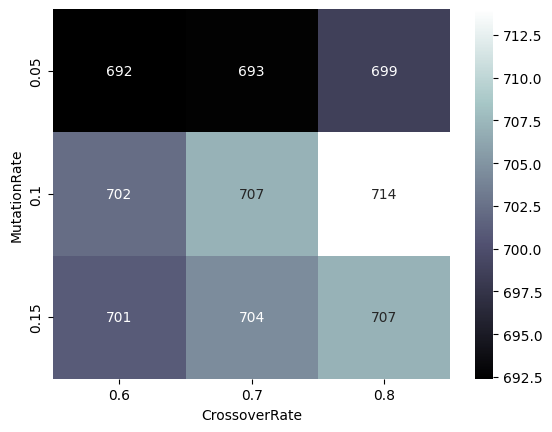

In [7]:
df = pd.read_csv('results/test_params.csv')

df_grouped = df.groupby(['MutationRate', 'CrossoverRate']).agg(
    SolutionCostMean=('SolutionCost', 'mean'),
).reset_index()

heatmap_data = df_grouped.pivot_table(
    index='MutationRate', 
    columns='CrossoverRate', 
    values='SolutionCostMean',
)

sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='bone',
            fmt='.0f')
plt.show()

# CROSSOVER METHODS